In [50]:
import os
import numpy as np
from PIL import Image
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
import requests
from torch import nn
import torch
import matplotlib.pyplot as plt
import pdb

def calculate_iou(prediction, target):
    # Resize the target mask to match the dimensions of prediction
    target = np.array(Image.fromarray(target).resize((prediction.shape[1], prediction.shape[0])))
    
    
    # prediction = (prediction > 0).astype(np.uint8)
    target = (target[:, :, 1] ).astype(np.uint8)
    plt.imshow(prediction)
    intersection = np.logical_and(prediction, target)
    union = np.logical_or(prediction, target)
    
    iou_score = np.sum(intersection) / np.sum(union)
    
    return iou_score

def evaluate_dataset(dataset_dir, model, feature_extractor, device='cuda'):
    model.to('cuda')
    model.eval()

    iou_scores = []

    for filename in os.listdir(dataset_dir):
        if filename.endswith(".jpg"):
            image_path = os.path.join(dataset_dir, filename)
            image = Image.open(image_path)

            # Split the image into the original image and the embedded mask
            width = image.width // 2
            orig_image = image.crop((0, 0, width, image.height))
            mask = image.crop((width, 0, image.width, image.height))

            with torch.no_grad():
                inputs = feature_extractor(images=orig_image, return_tensors="pt").to('cuda')
                outputs = model(**inputs)
                logits = outputs.logits
                pred_seg = logits.argmax(dim=1)[0].cpu().numpy()

            mask = np.array(mask)
            iou = calculate_iou(pred_seg, mask)
            # plt.imshow(mask)
            iou_scores.append(iou)
        
            
    mean_iou = np.mean(iou_scores)
    return mean_iou



Mean IOU: 0.591172454655024


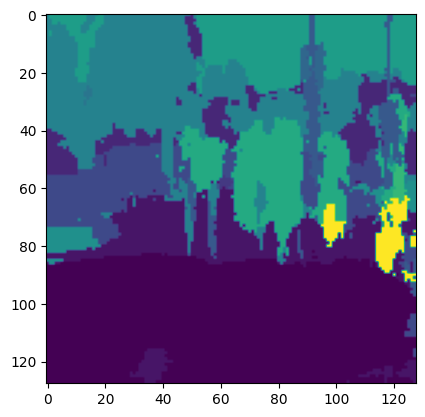

In [52]:

# Replace this path with the path to your dataset
dataset_path = r"C:\Users\mmkha\AI course\Deep Learning Projects\Vision Transformer\Sementic Segmentation\cityscapes_data\val"
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b0-finetuned-cityscapes-640-1280")
feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b0-finetuned-cityscapes-640-1280")

mean_iou = evaluate_dataset(dataset_path, model, feature_extractor)
print(f"Mean IOU: {mean_iou}")

In [ ]:
# Mean IOU: 0.5911902045587868 for Train
# Mean IOU: 0.586088109896489 for Train
   


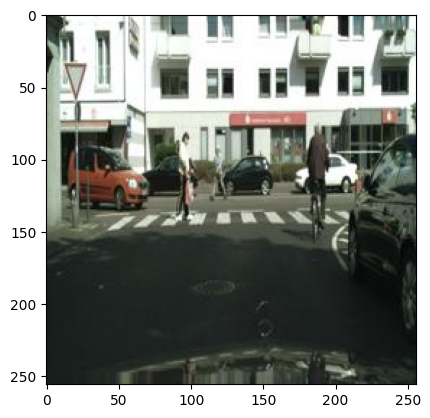

In [12]:
# for filename in os.listdir(dataset_dir):
#         if filename.endswith(".jpg"):
            # image_path = os.path.join(dataset_dir, filename)
image = Image.open('3.jpg')

# Split the image into the original image and the embedded mask
width = image.width // 2
orig_image = image.crop((0, 0, width, image.height))
mask = image.crop((width, 0, image.width, image.height))
plt.imshow(orig_image)
# break

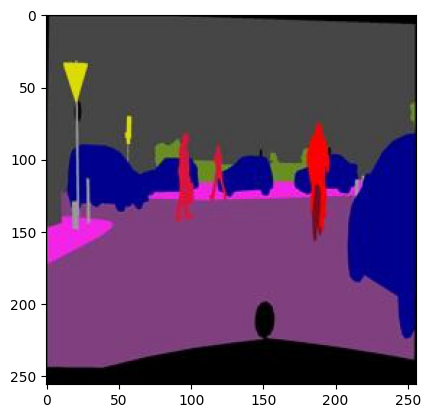

In [23]:
plt.imshow(mask)


In [65]:
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b0-finetuned-cityscapes-640-1280")
feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b0-finetuned-cityscapes-640-1280")
inputs = feature_extractor(images=orig_image, return_tensors="pt").to('cuda')
model.to('cuda')
outputs = model(**inputs)
logits = outputs.logits
pred_seg = logits.argmax(dim=1)[0].cpu().numpy()

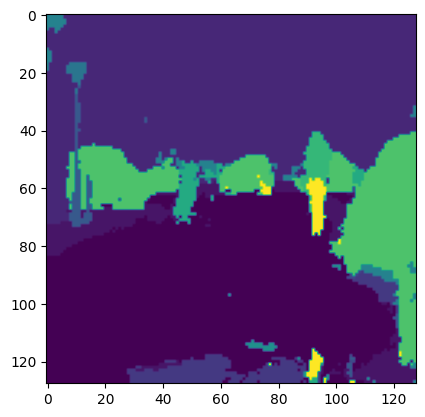

In [66]:
plt.imshow(pred_seg)

In [67]:
iou = calculate_iou(pred_seg, mask)

ValueError: operands could not be broadcast together with shapes (128,128) (256,256,3) 

In [18]:
pred_seg.shape

(128, 128)

In [20]:
mask.size

(256, 256)

In [27]:
from torch.nn import Conv2d

In [61]:
model.decode_head.classifier=Conv2d(256, 19, kernel_size=(1, 1), stride=(1, 1))

In [68]:
model.classes

AttributeError: 'SegformerForSemanticSegmentation' object has no attribute 'classes'